In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("Bitcoin_data.csv")

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Market_Cap,Tomorrow,Target
0,2023-05-12,26987.662514,27055.647228,25878.428830,26804.990671,1.931360e+10,5.192540e+11,26784.078561,0
1,2023-05-11,27621.086872,27621.941986,26781.827002,27000.788271,1.672434e+10,5.230230e+11,26804.990671,0
2,2023-05-10,27654.636777,28322.688328,26883.669883,27621.756227,2.065603e+10,5.350262e+11,27000.788271,0
3,2023-05-09,27695.068069,27821.400606,27375.600690,27658.774673,1.412859e+10,5.357136e+11,27621.756227,0
4,2023-05-08,28450.457478,28663.272332,27310.135612,27694.272896,1.912290e+10,5.363754e+11,27658.774673,0


In [19]:
x = df.drop(labels=['Target'],axis=1)
y = df[['Target']]

In [20]:
numerical_cols = x.select_dtypes(exclude='object').columns

In [21]:
numerical_cols

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market_Cap', 'Tomorrow'], dtype='object')

In [22]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [23]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols)
])

In [24]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [25]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [27]:
def evaluate_model(true, predicted):
    Accuracy_score = accuracy_score(true,predicted)
    return Accuracy_score

In [28]:
## Train multiple models

models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier()
}
trained_model_list=[]
model_list=[]
accuracy_list=[]
y_predict = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    Accuracy=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    y_predict.append(y_pred)

    print('Model Training Performance')
    print("Accuracy:",Accuracy*100)


    accuracy_list.append(Accuracy)
    
    print('='*35)
    print('\n')

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shreyash12\AppData\Local\Temp\ipykernel_17580\1964529693.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LogisticRegression
Model Training Performance
Accuracy: 67.21162579473207


DecisionTree
Model Training Performance
Accuracy: 74.29609445958219


RandomForest
Model Training Performance
Accuracy: 75.74931880108991




In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

LogisticRegression




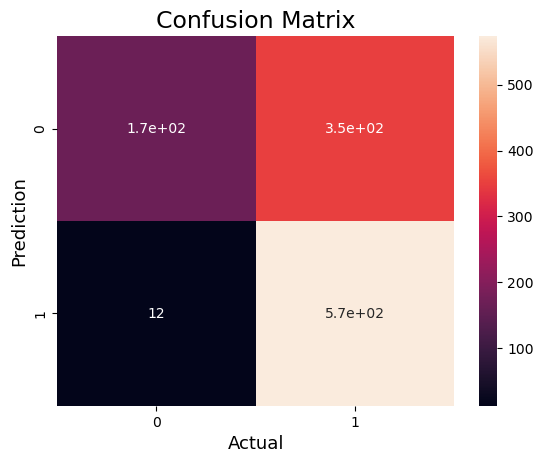

DecisionTree




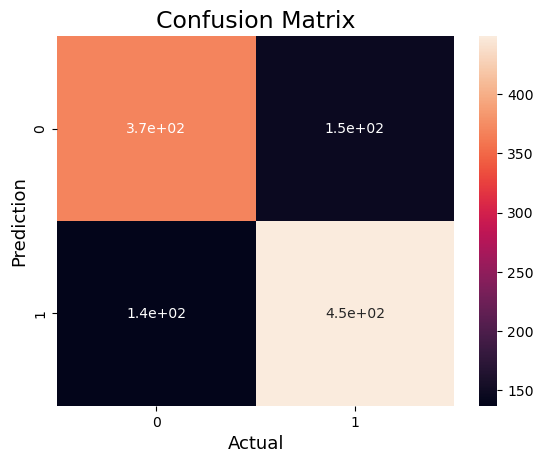

RandomForest




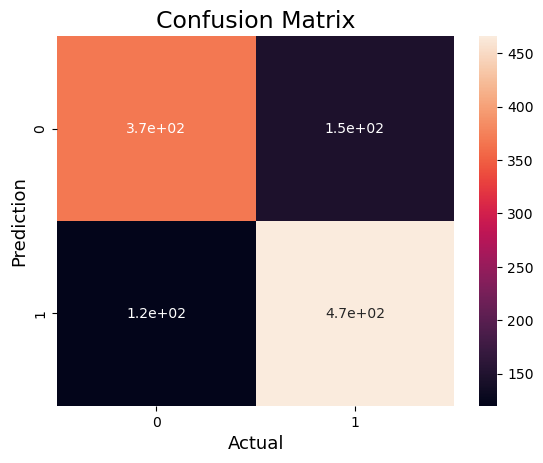

In [30]:
for i in range(len(y_predict)):
    print(list(models.keys())[i])
    cm = confusion_matrix(y_test,y_predict[i])
    sns.heatmap(cm,annot=True)
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    print('\n')
    plt.show()